## Text Mining Practice

In this exercise, we will practice what we learned in terms of text mining.  We will use a dataset of Tweets on Covid-19 which is available from Kaggle at https://www.kaggle.com/datatattle/covid-19-nlp-text-classification. The dataset has been manually labelled for a sentiment analysis classification task.

We start by loading the data as we have done before, as well as the necessary libraries. We will look at how to preprocess text data, generate features, visualise the features, transform the to counts and then generate train/validation/test partitions for classification.  We will finish by applying some classification algorithms to the features generated 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
print("Setup complete.")
import os

Setup complete.


### Import data and prepare data frames 

We start by importing the data.  Theere are some issues with the encoding of this dataset which means we need to include the _encoding='latin'_ in the read_csv call. Start by reading the data and examining the contents.

In [2]:
cwd = os.getcwd()
train_path = cwd + "/Corona_NLP_train.csv"
test_path = cwd + "/Corona_NLP_test.csv"

train_df = pd.read_csv(train_path, encoding = 'latin')
test_df = pd.read_csv(test_path, encoding = 'latin')

train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


Let us look at the name of the columns in the train data.

In [3]:
columns = list(train_df)
columns

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

Now we can read the test data, as we did the train, and look at the first few lines.  Again we have to specify the encoding.  

In [4]:
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In order to perform the following operations it is best to concatenate the train and test data into one data frame.  We can also make sure that we typecast the _OriginalTweet_ and _Sentiment_ in each data frame to str by using `.astype(str)`.

In [5]:
df = pd.concat([train_df, test_df], axis = 0, ignore_index = True)
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


Now, to save ourselves some time as the original files are large, we can work with a sample of the data.  Let us say we use 4000 samples for the _df_ which contains the concatenated file or 2000 for each the _Covid_train_ and _Covid_test_ data frames.  

In [6]:
from sklearn.utils import resample

n = 4000

resampled_df = resample(df, replace=True, n_samples=n, random_state=10)

resampled_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
17673,21472,66424,"Stockholm, Sweden",23-03-2020,Our local supermarket has grave candles on spe...,Neutral
40061,43860,88812,NaN,13-04-2020,Gold Prices May Stay High as 2008 Crisis Cure ...,Extremely Negative
29199,32998,77950,NaN,05-04-2020,They say know the facts #coronavirus\r\r\n\r\r...,Negative
28017,31816,76768,Social Security Directorate,04-04-2020,Check our advice if you re looking for a refun...,Negative
40059,43858,88810,"Doral, Florida",13-04-2020,"With the mask, you can protect yourself, #soci...",Positive
...,...,...,...,...,...,...
16210,20009,64961,NaN,22-03-2020,"Ok, So Asymptomatic doesn't know he/she is con...",Neutral
24653,28452,73404,NaN,27-03-2020,@nahashon87 Actually bailing out industries is...,Extremely Positive
18171,21970,66922,"Melbourne, Victoria",23-03-2020,Stock up on fresh food today at QVM - https://...,Positive
22521,26320,71272,San Onofre Surf Beach,25-03-2020,In China you have a health score on your cellp...,Neutral


Now we can look at the shape of the _df_ and the memory usage.  

In [7]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 17673 to 1815
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       4000 non-null   int64 
 1   ScreenName     4000 non-null   int64 
 2   Location       3147 non-null   object
 3   TweetAt        4000 non-null   object
 4   OriginalTweet  4000 non-null   object
 5   Sentiment      4000 non-null   object
dtypes: int64(2), object(4)
memory usage: 218.8+ KB


## Duplicates and null values 

Another thing we may want to do is to remove duplicates as it is often the case in Tweets that we get duplicate tweets so let us try that.  This could be done with the `drop_duplicates()` function. 

In [8]:
df = resampled_df.drop_duplicates()
df.shape

(3819, 6)

Now, let us look at how many null values we have in each of the attributes or fields. We can do this for _df_.  Let's calculate the number and percentage missing for each column or attribute.  

In [9]:
for column in columns:
    nulls = df.isnull().sum()[column]
    total = df.shape[0]
    print(f'{column} : {nulls/total*100:.0f}%')

UserName : 0%
ScreenName : 0%
Location : 21%
TweetAt : 0%
OriginalTweet : 0%
Sentiment : 0%


Now, let's explore the _Sentiment_ attribute as it contains our target class. We can look at unique value counts for each label.  

In [10]:
df['Sentiment'].value_counts()

Positive              1031
Negative               973
Neutral                684
Extremely Positive     605
Extremely Negative     526
Name: Sentiment, dtype: int64

We have 5 labels, but we could merge some (e.g. Extremelly Positive and Positive) to have 3 classes, _Positive_, _Negative_ and _neutral_.   I will call it _sentiment_ in lower case. We can create a new field which has the new reduced label set.  Also before we do  that, let us make a copy of the _OriginalTweet_ typecast as str, I will call that _text_. We can finish by looking at the proportion of tweets for each new class label.  

In [11]:
df.loc[:,'Sentiment'] = df['Sentiment'].replace(['Extremely Positive'],'Positive')
df.loc[:,'Sentiment'] = df['Sentiment'].replace(['Extremely Negative'],'Negative')
        
df.loc[:,'text'] = df['OriginalTweet'].astype(str)

c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Let us produce a count of tweets in the _df_ per new label.

In [12]:
df['Sentiment'].value_counts()

Positive    1636
Negative    1499
Neutral      684
Name: Sentiment, dtype: int64

And also a `countplot` showing the Tweets in each label. 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

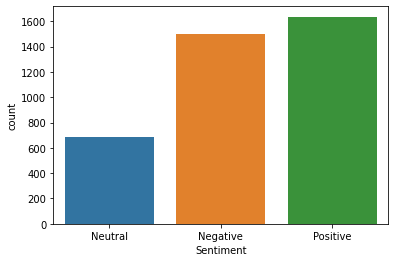

In [13]:
import seaborn as sns

sns.countplot(x = 'Sentiment', data = df)

## Cleaning and preprocessing of the Tweet text

Let us start by doing some clearning.  We can first use the regular expresion `re` library to remove any urls from the new column that we produced as a copy of the _OriginalTweet_. I have called it _text_ so I can transform _text_ to remove urls.

In [14]:
import re

df.loc[:,'text'] = df.loc[:,'text'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))
print(df['text'])

17673    Our local supermarket has grave candles on spe...
40061    Gold Prices May Stay High as 2008 Crisis Cure ...
29199    They say know the facts #coronavirus\r\r\n\r\r...
28017    Check our advice if you re looking for a refun...
40059    With the mask, you can protect yourself, #soci...
                               ...                        
10557    All the Uk panic buyers are kinda playing supe...
30408    #Oil prices fell on Monday after Saudi Arabia ...
24653    @nahashon87 Actually bailing out industries is...
22521    In China you have a health score on your cellp...
1815     Delivery companies and other services are adap...
Name: text, Length: 3819, dtype: object


c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In order to look at what we have so far, we may want to remove stopwords and, once is done, look at the most common words in each class using word clouds and for this we can use the list provided by `nltk.corpus`.  Let us  define the stop words which for the English language are defined in `nltk.corpus.stopwords.words`, and then later we can use that stopword list to remove very common words.  In fact, in our data there are also certain words that are very frequent but will not help us to differentiate the clases, such as 'covid','coronavirus','covid19','covid_19','covid 2019'.  We can add those to the stop word list, e.g. using the `.extend()` function.

In [15]:
import nltk.corpus
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['covid','coronavirus','covid19','covid_19','covid 2019']
stopwords.extend(newStopWords)

## Word cloud visualisations

Now, we can separate the vocabulary for each class.  Let us start with _Neutral_.  We can define a list of neutral words, `neutral_words` that we can then inspect.  

In [16]:
neutral_words = ""
NeutralText=df.loc[df.Sentiment=='Neutral']

for val in NeutralText['text'] :      

    val = str(val)
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
        neutral_words += " ".join(tokens)+" "

Now using the `WordCloud` and `STOPWORDS` from `wordcloud`, we can generate a visualisation that will contain the most common words in the class _neutral_.  We need to use matplotlib.pyplot so if you did not import it you will eed it now to plot the word cloud.  

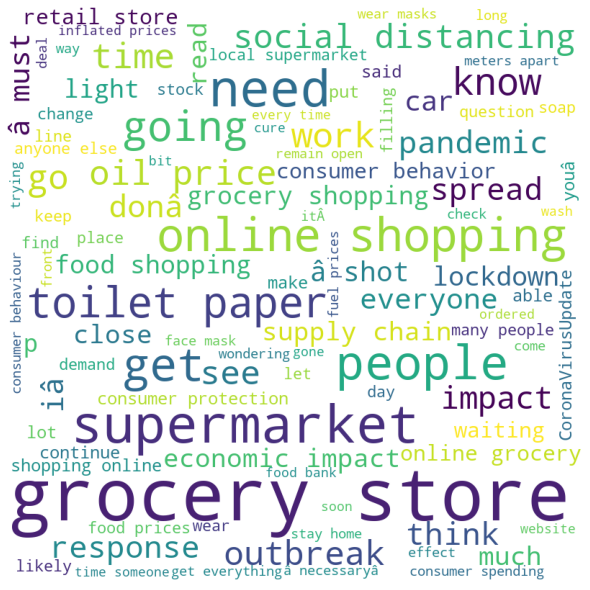

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_font_size=100, 
                max_words=100).generate(neutral_words)
                                                                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()



We can repeat the same for the negative words.  

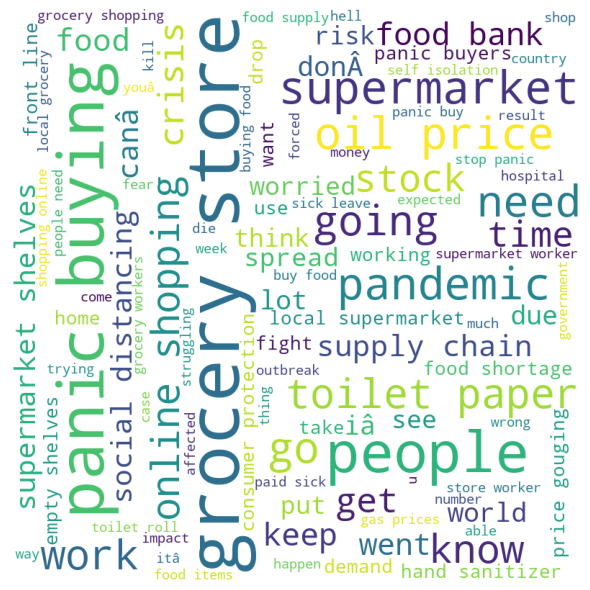

In [18]:
negative_words = ""
NegativeText=df.loc[df.Sentiment=='Negative']

for val in NegativeText['text'] :      

    val = str(val)
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
        negative_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_font_size=100, 
                max_words=100).generate(negative_words)
                                                                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()



And do the same for the positve words.  

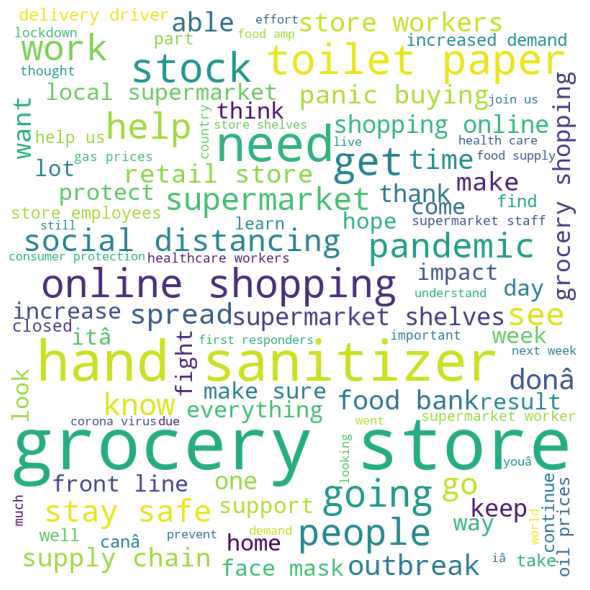

In [19]:
positive_words = ""
PositiveText=df.loc[df.Sentiment=='Positive']

for val in PositiveText['text'] :      

    val = str(val)
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
        positive_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_font_size=100, 
                max_words=100).generate(positive_words)
                                                                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Now we can use the `nltk.corpus` library to extract the tokens or words from the _text_ field. Print the first Tweet to observe what tokens have been extracted.  

In [20]:
import nltk.corpus
import os
from nltk.tokenize import word_tokenize
Tweet_Token=[]
for tweet in df['text']: 
    Tweet_Token.append(word_tokenize(tweet))
print(Tweet_Token[0])

['Our', 'local', 'supermarket', 'has', 'grave', 'candles', 'on', 'special', 'offer', '...', '?', '#', 'CoronaVirusSverige', '#', 'COVID2019']


Next, we want to keep only alphanumeric characters, discarding puntuaction, hashtags and others.  This can be achieved with the `isalnum()` function.  Print the first Tweet to observe what tokens are now left.  

In [21]:
for i in range (0,len(Tweet_Token)):
    Tweet_Token[i] =[word for word in Tweet_Token[i] if word.isalnum() ] 
print(Tweet_Token[0])

['Our', 'local', 'supermarket', 'has', 'grave', 'candles', 'on', 'special', 'offer', 'CoronaVirusSverige', 'COVID2019']


At this point, we could look at the most frequent tokens in our collection.  For this we can use the `FreqDist` function from the nltk.probability library.

In [22]:
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Tweet_Token)):
    for word in Tweet_Token[i]:
        fdist[word.lower()]+=1
        
fdist

FreqDist({'the': 4240, 'to': 3638, 'and': 2291, 'of': 1992, 'in': 1830, 'a': 1804, 'coronavirus': 1661, 'for': 1272, 'is': 1201, 'are': 1071, ...})

And we can find the `most_common(x)` of `fdist` using that function where x is the number of tokens, e.g. with 10 we will see the 10 most frequent tokens.  

In [23]:
fdist1 = fdist.most_common(10)
fdist1

[('the', 4240),
 ('to', 3638),
 ('and', 2291),
 ('of', 1992),
 ('in', 1830),
 ('a', 1804),
 ('coronavirus', 1661),
 ('for', 1272),
 ('is', 1201),
 ('are', 1071)]

What we have observed is that many of the common words are what we will call _stopwords_, i.e. words that are common in any text and we may want to ignore.  For this we can use the `stopwords` function from the `nltk.corpus` library to remove stopwords.  

In [24]:
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))

for i in range (0,len(Tweet_Token)):
    Tweet_Token[i] =[word for word in Tweet_Token[i] if word not in a ] 
print(Tweet_Token[1])


['Gold', 'Prices', 'May', 'Stay', 'High', '2008', 'Crisis', 'Cure', 'Bedevils', 'Policy', 'Gold', 'prices', 'keeping', 'interest', 'rates', 'response', '2008', 'global', 'financial', 'crisis', 'proves', 'problematic', 'fighting', 'next', 'one', 'coronavirus', 'outbreak']


Now we can look at operations like Stemming and Lemmatization.  Here you can find a good explanation https://www.datacamp.com/community/tutorials/stemming-lemmatization-python.  For the stemming, which consists of reducing the word to the root, so that a group of words are mapped to the same route, we can use the `LancasterStemmer` from `nltk.stem` or the `PorterStemmer`.  

Lemmatization on the other hand (see previous link), reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma.   For example, runs, running, ran are all forms of the word run, therefore run is the lemma of all these words. Because lemmatization returns an actual word of the language, it is used where it is necessary to get valid words. It may be best for us in this application as we may want to have valid words.  We can lematize using `WordNetLemmatizer` from `nltk.stem`.  Let us do that on the original tokens as we will continue with that approach.  For the lemmatization it may also be necessary to conver to lower case as it is not automatically done.  

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
for i in range (0,len(Tweet_Token)):
    Tweet_Token[i] =[lemmatizer.lemmatize(word) for word in Tweet_Token[i]]
    Tweet_Token[i] =[word.lower() for word in Tweet_Token[i]] 
print(Tweet_Token[1])

['gold', 'prices', 'may', 'stay', 'high', '2008', 'crisis', 'cure', 'bedevils', 'policy', 'gold', 'price', 'keeping', 'interest', 'rate', 'response', '2008', 'global', 'financial', 'crisis', 'prof', 'problematic', 'fighting', 'next', 'one', 'coronavirus', 'outbreak']


Let us again, after all the operations, look now at the frequency of workd usng the `fdist` function and in the next cell work out the most common words (e.g. 10 most common).

In [26]:
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Tweet_Token)):
    for word in Tweet_Token[i]:
        fdist[word.lower()]+=1
        
fdist1 = fdist.most_common(15)
fdist1

[('coronavirus', 1661),
 ('i', 954),
 ('food', 791),
 ('store', 753),
 ('price', 708),
 ('supermarket', 697),
 ('grocery', 615),
 ('people', 568),
 ('consumer', 472),
 ('covid19', 466),
 ('amp', 462),
 ('the', 419),
 ('19', 391),
 ('covid', 370),
 ('shopping', 364)]

## Generating features using counts

Now we need to transform the words into a suitable representation for a classification algorithm.  One such representation is obtained using the `CountVectorizer` from `sklearn.feature_extraction.text`.  In order to apply this we need to concatenate the words back in each tweet.  We then apply the `CountVectorizer()` function to generate a matrix that represents the tweets as rows and the words as columns.  The value will be 0 if the word does not appear in the Tweet and 1 otherwise.  

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

Tweet_concat=[' '.join(word) for word in Tweet_Token]

my_bow = CountVectorizer()
bow = my_bow.fit_transform(Tweet_concat)
print(bow.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now we are ready to generate our X and y vectors for the classification.  X can be made up of the bag of words (bow) we just obtained and y is the _Sentiment_ feature.  If we use the original _Sentiment_ we will classify into 5 classes.   I will use my version with 3 classes, which I saved as _sentiment_ with lower case. 

In [28]:
X= bow
y=df['Sentiment']
print(X.shape)
print(y)

(3819, 12357)
17673     Neutral
40061    Negative
29199    Negative
28017    Negative
40059    Positive
           ...   
10557    Negative
30408    Negative
24653    Positive
22521     Neutral
1815     Positive
Name: Sentiment, Length: 3819, dtype: object


As in previous classification labs, we need to encode the class labels using the `LabelEncoder` so that they are transformed to a numeric feature. 

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)
print(le.classes_)
y

['Negative' 'Neutral' 'Positive']


array([1, 0, 0, ..., 2, 1, 2])

Now we need to do the usual spliting of our data into train and test data. 

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

We are now ready to try a classifier.  We can start with a Suppor Vetor Machine with some standard parameters. I will use a  `kernel='poly', degree=3`

In [31]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='poly', degree=3)

clf_svm.fit(X_train,y_train);

Now we can use the model to predict for the _X_text_ dataset. 

In [32]:
y_hat = clf_svm.predict(X_test)
print(y_hat)

[2 0 0 ... 2 2 2]


And next we can work out the precision, recall, etc. through the `classification_report` plus create the confusiom matrix to see how well the model did on the test data. 

Results on the test set:
              precision    recall  f1-score   support

           0       0.29      0.77      0.42       167
           1       0.00      0.00      0.00         0
           2       0.94      0.47      0.63       979

    accuracy                           0.51      1146
   macro avg       0.41      0.41      0.35      1146
weighted avg       0.85      0.51      0.60      1146



c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tmccl\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

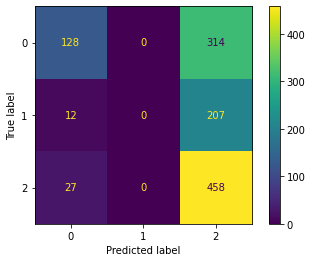

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_hat)

plot_confusion_matrix(clf_svm, X_test, y_test)

print('Results on the test set:')
print(classification_report(y_hat, y_test))

We can learn an alternative model like a `RandomForestClassifier`. 

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy',max_depth= 2,class_weight='balanced')
clf.fit(X_train,y_train);
y_hat = clf.predict(X_test)
y_hat

array([2, 1, 1, ..., 1, 2, 2])

And compute the confusion matrix, etc. 

Results on the test set:
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       333
           1       0.74      0.32      0.45       506
           2       0.45      0.70      0.55       307

    accuracy                           0.53      1146
   macro avg       0.56      0.57      0.52      1146
weighted avg       0.59      0.53      0.51      1146



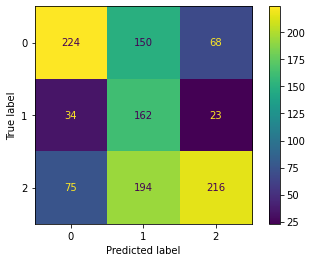

In [35]:
cm = confusion_matrix(y_test, y_hat)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

print('Results on the test set:')
print(classification_report(y_hat, y_test))

We could use GridSearchCV to find the best parameters for the random forest classifier to see if we can improve. 

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Results on the test set:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       442
           1       0.42      0.69      0.52       219
           2       0.70      0.60      0.64       485

    accuracy                           0.62      1146
   macro avg       0.61      0.63      0.61      1146
weighted avg       0.65      0.62      0.63      1146

[2 0 0 ... 1 2 0]


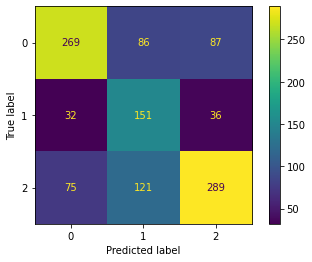

In [37]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 1200]
max_depth = [5, 15, 30]
min_samples_split = [2, 10, 100]
min_samples_leaf = [1, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
  
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), hyperF, refit = True,verbose=1,n_jobs=-1) 
  
clf.fit(X_train,y_train);

print("Best parameters found:",clf.best_params_)

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print (y_pred)
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(clf,X_test, y_test)

Finally, we can try to transform a different type of vectorizer.  Let us use the `TfidfVectorizer` to compute _tfidf_ weightings for each feature. 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(Tweet_concat)

print (text_tf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We can now from those define again our X and y.  X will use the tfidf vectors. 

In [39]:
X = text_tf
print(X.shape)
print(X[0])
print(y)

(3819, 12357)
  (0, 2765)	0.22611652785096975
  (0, 2640)	0.4396035527395928
  (0, 7744)	0.30124223024559366
  (0, 10274)	0.3153949722875705
  (0, 1796)	0.46147559805690824
  (0, 4913)	0.4396035527395928
  (0, 10656)	0.14824743705946927
  (0, 6548)	0.23040565509978025
  (0, 7904)	0.2900415189999867
[1 0 0 ... 2 1 2]


Next, we again divide into train and test set. 

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now we learn a random forest classifier using the parameters we learned with the grid search.

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy',max_depth= 25,class_weight='balanced', min_samples_leaf= 1, 
                             min_samples_split= 2, n_estimators= 300)
clf.fit(X_train,y_train);
y_hat = clf.predict(X_test)
y_hat

array([2, 2, 2, ..., 0, 2, 1])

And finally look at confusion matrix etc. for that model.

Results on the test set:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       419
           1       0.64      0.54      0.59       266
           2       0.71      0.69      0.70       461

    accuracy                           0.67      1146
   macro avg       0.67      0.66      0.66      1146
weighted avg       0.67      0.67      0.67      1146



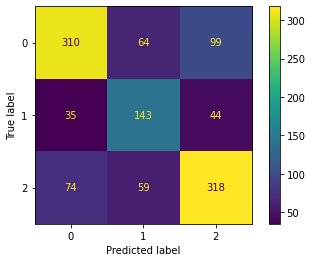

In [42]:
cm = confusion_matrix(y_test, y_hat)

plot_confusion_matrix(clf, X_test, y_test)

print('Results on the test set:')
print(classification_report(y_hat, y_test))

Ok, enough for today although of course you could do more practice by improving your preprocessing, trying more models, etc. 